# Analisis exploratorio
Primero vamos a conocer que es lo que hay en el banco de datos descargado, estar seguros de que se ha corrido el **setup.sh** y la carpeta ***UrbanSound8K*** esta en la carpeta data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import glob
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import os

%matplotlib inline

2025-05-09 13:11:36.446186: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-09 13:11:36.486995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746817896.497192   41995 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746817896.500556   41995 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746817896.509752   41995 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# revisamos que tenemos acceso a GPU porque este es un modelo grande, o por lo menos los datos a procesar son grandes al ser audios
print("Dispositivos disponibles:")
print(tf.config.list_physical_devices())

Dispositivos disponibles:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# cargamos los datos
FILES_PATH = "./data/UrbanSound8K"  # path de los audios para cargar
df = pd.read_csv(
    f"{FILES_PATH}/metadata/UrbanSound8K.csv"
)  # urbansound8k ya nos da el metadato al desar el banco de datos
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
df["audio_path"] = df.apply(
    lambda row: os.path.join(
        FILES_PATH, "audio", f"fold{row['fold']}", row["slice_file_name"]
    ),
    axis=1,
)
df.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class,audio_path
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,./data/UrbanSound8K/audio/fold5/100032-3-0-0.wav
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,./data/UrbanSound8K/audio/fold5/100263-2-0-117...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,./data/UrbanSound8K/audio/fold5/100263-2-0-121...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,./data/UrbanSound8K/audio/fold5/100263-2-0-126...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,./data/UrbanSound8K/audio/fold5/100263-2-0-137...


## Analisis del dataframe

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   audio_path       8732 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 614.1+ KB


,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [6]:
# estadisticas descriptivsas
df.describe(include="all")  # Estadísticas para columnas numéricas y categóricas

,slice_file_name,fsID,start,end,salience,fold,classID,class,audio_path
count,8732,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732,8732
unique,8732,NaN,NaN,NaN,NaN,NaN,NaN,10,8732
top,99812-1-6-0.wav,NaN,NaN,NaN,NaN,NaN,NaN,dog_bark,./data/UrbanSound8K/audio/fold7/99812-1-6-0.wav
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1000,1
mean,NaN,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877,NaN,NaN
std,NaN,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544,NaN,NaN
min,NaN,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000,NaN,NaN
25%,NaN,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000,NaN,NaN
50%,NaN,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000,NaN,NaN
75%,NaN,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000,NaN,NaN


In [7]:
# clases unicas
print("Categorías únicas:", df["class"].unique())
print("Conteo por clase:\n", df["class"].value_counts())

Categorías únicas: ['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']
Conteo por clase:
 class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


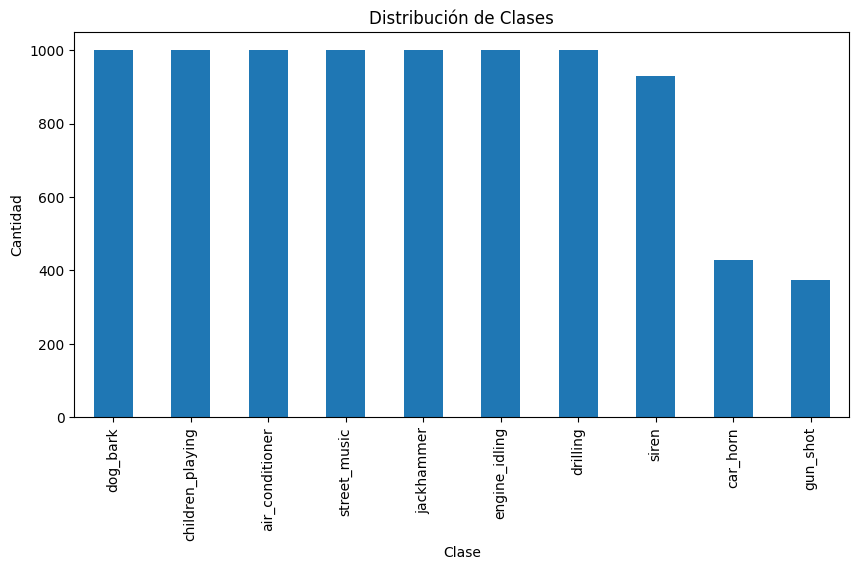

In [8]:
# distribucion de las clases
df["class"].value_counts().plot(kind="bar", figsize=(10, 5))
plt.title("Distribución de Clases")
plt.ylabel("Cantidad")
plt.xlabel("Clase")
plt.show()

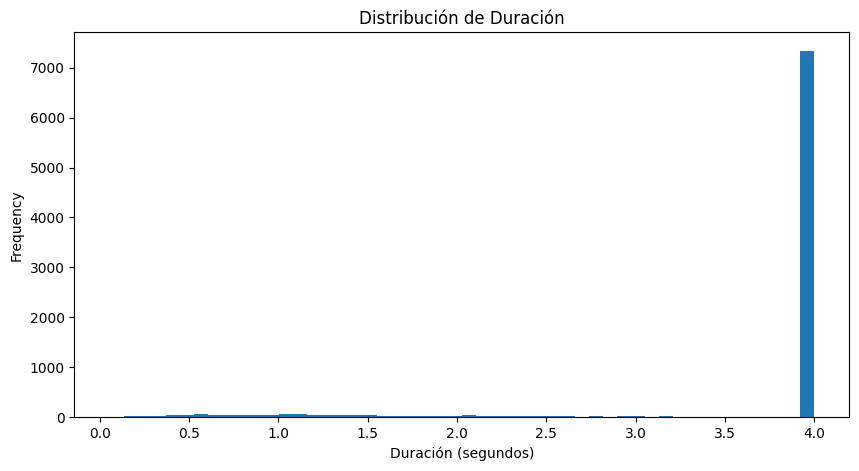

In [9]:
# duracion de los audios
df["duration"] = df["end"] - df["start"]
df["duration"].plot(kind="hist", bins=50, figsize=(10, 5))
plt.title("Distribución de Duración")
plt.xlabel("Duración (segundos)")
plt.show()

### Probando la carga y visualizacion de un audio
Vamos a cargar un audio y visualizarlo acotado por los tiempos dados

In [10]:
# Elige un archivo de audio (ej: la primera fila)
audio_path = df["audio_path"].iloc[0]  # Ajusta la ruta si es necesario
y, sr = librosa.load(audio_path, sr=None)  # Cargar audio

# Reproducir audio
Audio(data=y, rate=sr)

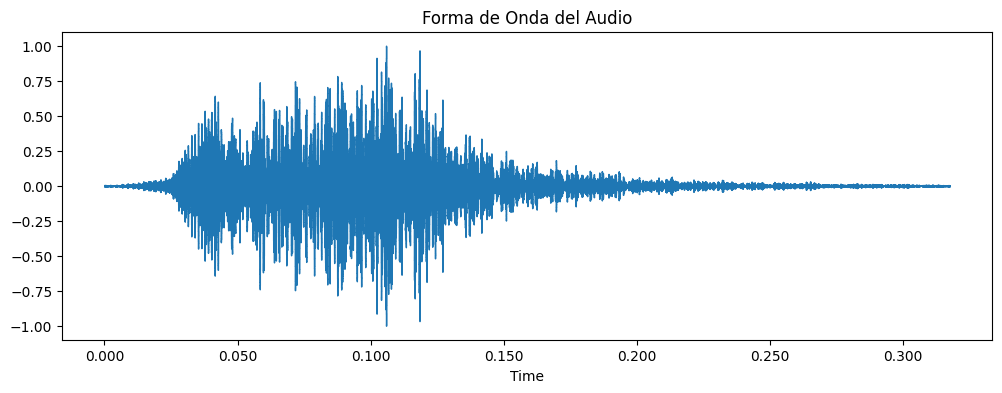

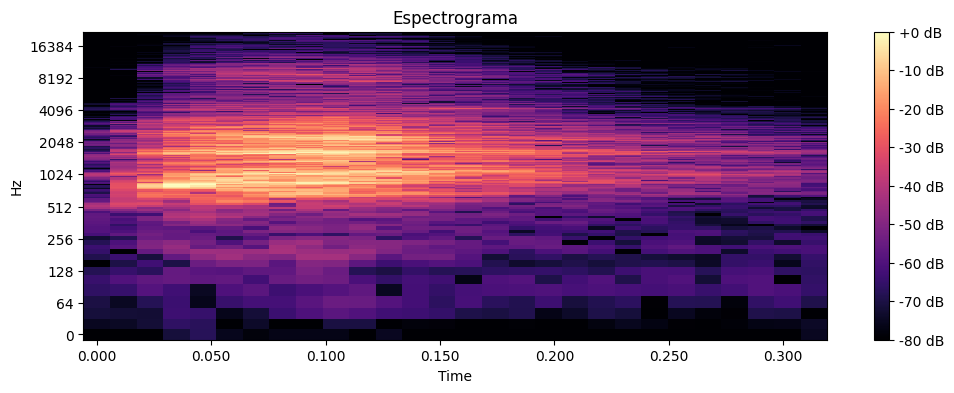

In [11]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Forma de Onda del Audio")
plt.show()

# Espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.show()

# Preparacion de los datos


In [12]:
# codificamos las etiquetas
# Convertir etiquetas de texto a números
le = LabelEncoder()
df["label"] = le.fit_transform(df["class"])  # Nueva columna 'label' con IDs numéricos
num_classes = len(df["class"].unique())  # Número de clases únicas (ej: 10)
num_classes

10

In [13]:
# Dividir entre los datos de prueba y entrenamiento de forma estratificada
from sklearn.model_selection import train_test_split

X = df["audio_path"]  # Features: rutas de audio
y = df["label"]  # Target: etiquetas codificadas

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## extraer las cualidades
Vamos a hacer funciones que nos sirvan para obtner los coeficientes cepstrales (MFCC) para representar cada audio como un tensor numericoc

In [14]:
def extract_mfcc(
    audio_path, n_mfcc=13, max_pad_len=174
):  # 174 es común para audios de ~4 segundos
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Asegurar longitud fija (padding o recorte)
    if mfccs.shape[1] < max_pad_len:
        mfccs = np.pad(
            mfccs, ((0, 0), (0, max_pad_len - mfccs.shape[1])), mode="constant"
        )
    else:
        mfccs = mfccs[:, :max_pad_len]

    return mfccs

In [15]:
# Aplicar a los conjuntos de train y test
X_train_mfcc = np.array([extract_mfcc(path) for path in X_train])
X_test_mfcc = np.array([extract_mfcc(path) for path in X_test])

# Añadir dimensión de canal (necesaria para CNN)
X_train_mfcc = X_train_mfcc[
    ..., np.newaxis
]  # Forma: (muestras, n_mfcc, max_pad_len, 1)
X_test_mfcc = X_test_mfcc[..., np.newaxis]

/mnt/data/files/url/url-notas/docs/0-RES/tecnologias-emergentes/proyecto final/venv/lib/python3.12/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


# Modelo CNN
Harwmos uso de una red CNN, para procesar los MFCCs


In [16]:
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

""" Definición del modelo
    La primera vez que se entreno tuimos un accuraccy del .6, por lo que hemos decidico agregar 
    layers.BatchNormalization() despues de cada capa convolucional y regularización L2 a las capas densas.
"""


model = models.Sequential(
    [
        # Capa de entrada
        layers.Input(shape=(13, 174, 1)),  # Ajustar según extract_mfcc
        # Bloques convolucionales
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        # Flatten + Dense
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        # Capa de salida
        layers.Dense(
            num_classes, activation="softmax", kernel_regularizer=regularizers.l2(0.01)
        ),  # 10 neuronas para 10 clases
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

I0000 00:00:1746818006.544134   41995 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 11, 172, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11, 172, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 5, 86, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 84, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 84, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 42, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,682 (1.39 MB)

 Trainable params: 364,490 (1.39 MB)

 Non-trainable params: 192 (768.00 B)

**AHORA TOCA ENTRENAR EL MODELO, ESTO PUEDE TARDAR DEPENDIENDO DE LA GPU Y DEL TAMAÑO DEL DATASET**

In [17]:
history = model.fit(
    X_train_mfcc,
    y_train,
    epochs=150,  # Ajustar según necesidad
    batch_size=32,
    validation_data=(X_test_mfcc, y_test),
)

Epoch 1/150


I0000 00:00:1746818007.775916   42203 service.cc:152] XLA service 0x746e8c0023d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746818007.775929   42203 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-09 13:13:27.800025: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746818007.928072   42203 cuda_dnn.cc:529] Loaded cuDNN version 90800


107/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2592 - loss: 5.1227

I0000 00:00:1746818009.638588   42203 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2824 - loss: 4.7466

2025-05-09 13:13:30.312461: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_125', 4 bytes spill stores, 4 bytes spill loads

2025-05-09 13:13:30.991509: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_125', 4 bytes spill stores, 4 bytes spill loads



191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2863 - loss: 4.6923 - val_accuracy: 0.4256 - val_loss: 2.9966
Epoch 2/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4484 - loss: 2.6994 - val_accuracy: 0.5019 - val_loss: 2.0727
Epoch 3/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4959 - loss: 2.0506 - val_accuracy: 0.6050 - val_loss: 1.6747
Epoch 4/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 1.7518 - val_accuracy: 0.6424 - val_loss: 1.4370
Epoch 5/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 1.5424 - val_accuracy: 0.6756 - val_loss: 1.3871
Epoch 6/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 1.4283 - val_accuracy: 0.7092 - val_loss: 1.2717
Epoch 7/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - loss: 1.4040 - val_accuracy: 0.7099 - val_loss: 1.2884
Epoch 8/150
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 1.3336 - val_accuracy: 0.7038

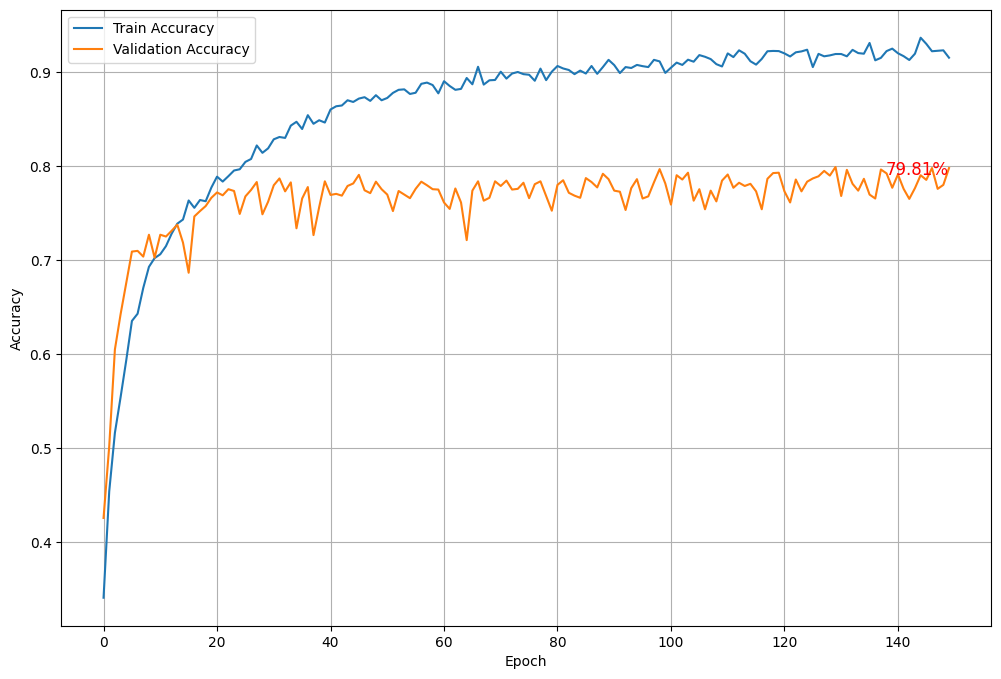

In [18]:
# curva de aprendizaje
plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")

# Agregar texto con el accuracy final
final_val_accuracy = (
    history.history["val_accuracy"][-1] * 100
)  # Último valor de val_accuracy
plt.text(
    len(history.history["val_accuracy"]) - 1,  # Última época
    history.history["val_accuracy"][-10],  # Valor de val_accuracy
    f"{final_val_accuracy:.2f}%",  # Texto con el porcentaje
    fontsize=12,
    color="red",
    ha="right",
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)  # Añadir una cuadrícula para mayor precisión
plt.show()

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 1.4602  
Precisión en test: 79.81%
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


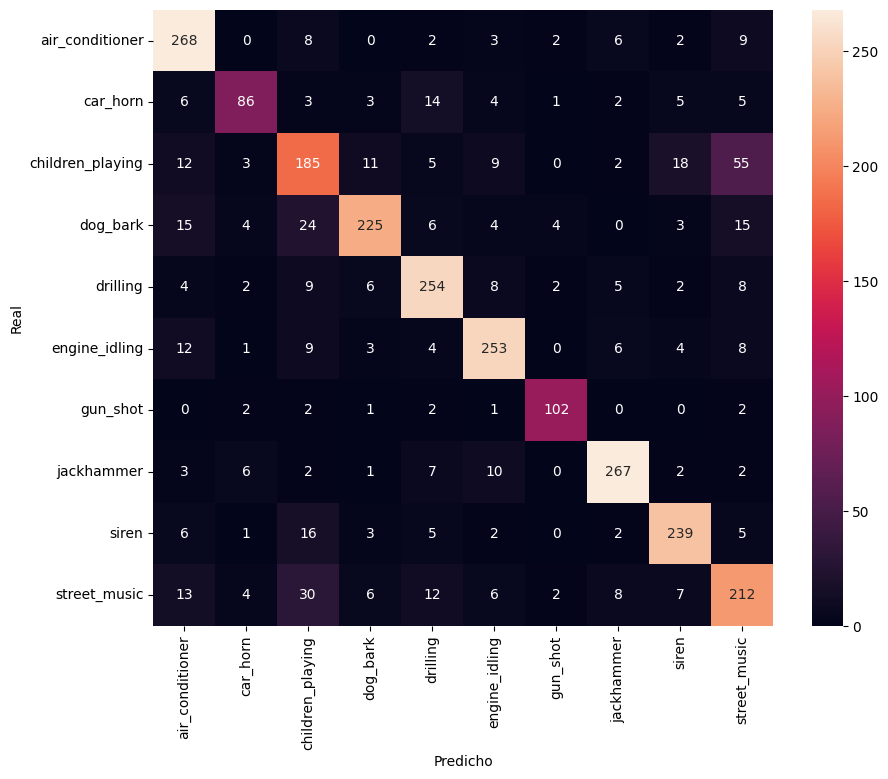

In [19]:
# Pérdida y precisión en test
test_loss, test_acc = model.evaluate(X_test_mfcc, y_test)
print(f"Precisión en test: {test_acc * 100:.2f}%")

# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test_mfcc), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show();

# MODELO GUARDADO

In [20]:
# Save the model in the recommended Keras format
model.save("audio_classifier.keras")

# Load the model
loaded_model = tf.keras.models.load_model("audio_classifier.keras")


In [21]:
def predict_audio(audio_path):
    mfcc = extract_mfcc(audio_path)[np.newaxis, ..., np.newaxis]
    pred = model.predict(mfcc)
    class_idx = np.argmax(pred)
    return le.inverse_transform([class_idx])[0]


# Ejemplo
audio_ejemplo = "./data/UrbanSound8K/audio/fold5/100032-3-0-0.wav"
print(f"Predicción: {predict_audio(audio_ejemplo)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Predicción: dog_bark
